2019-07


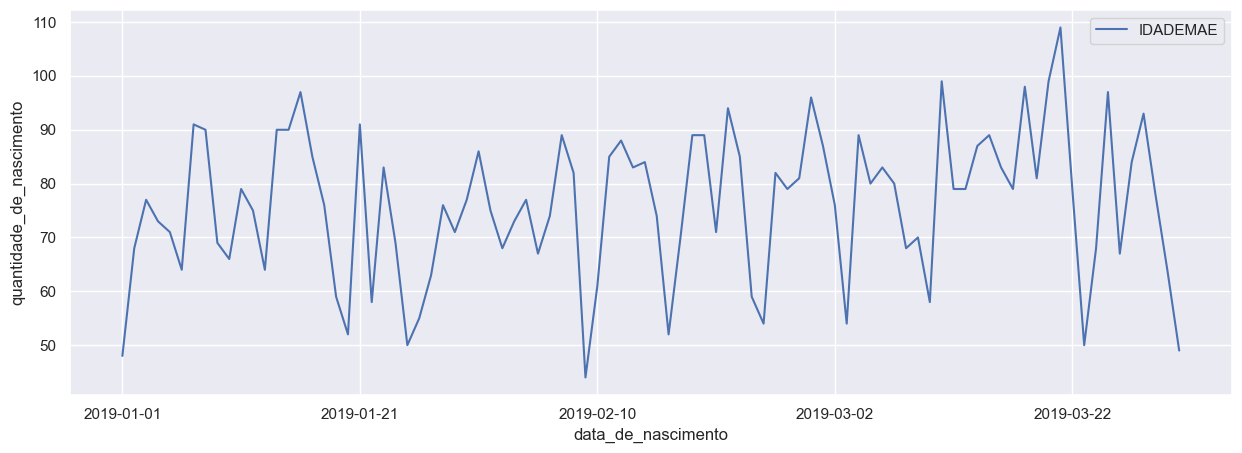

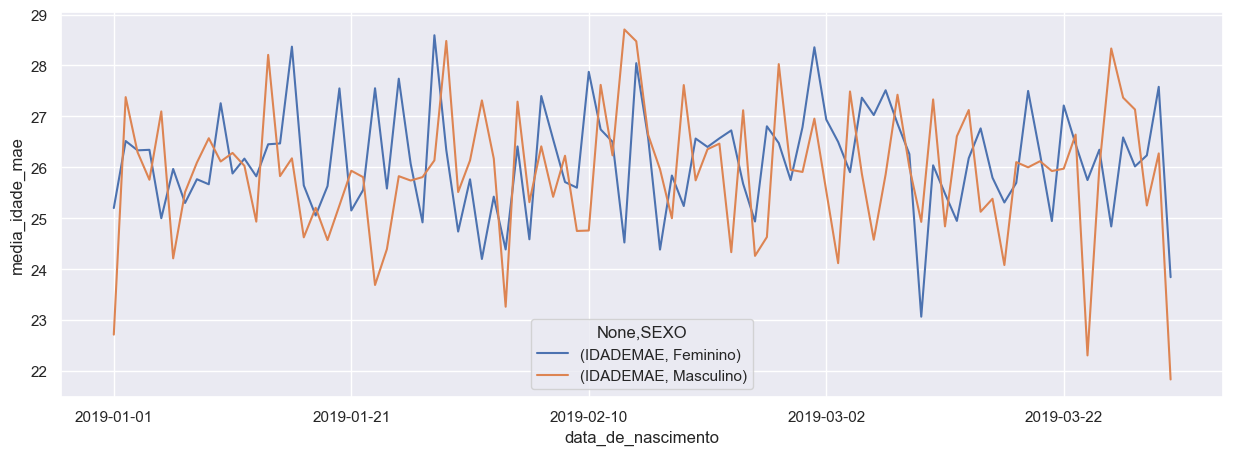

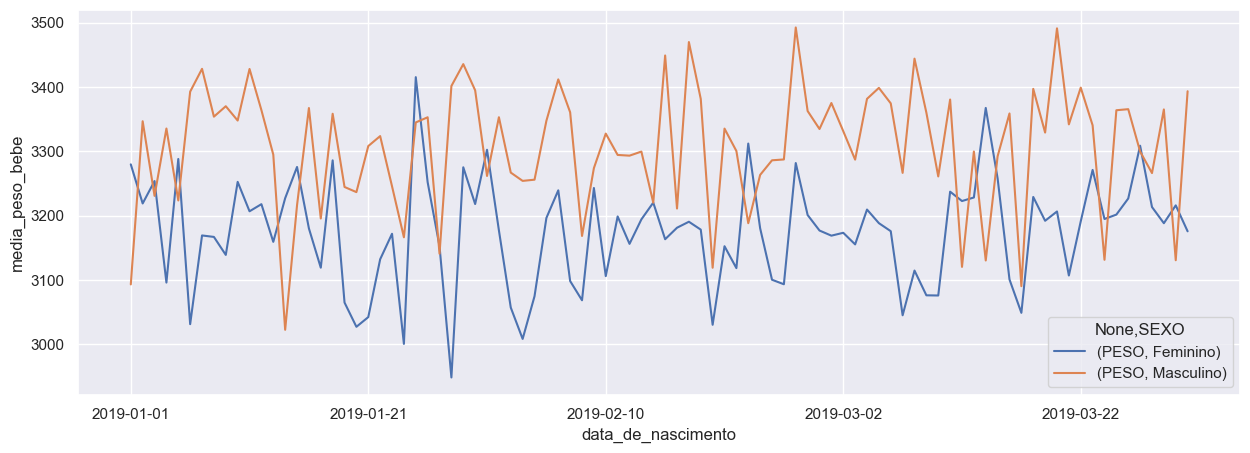

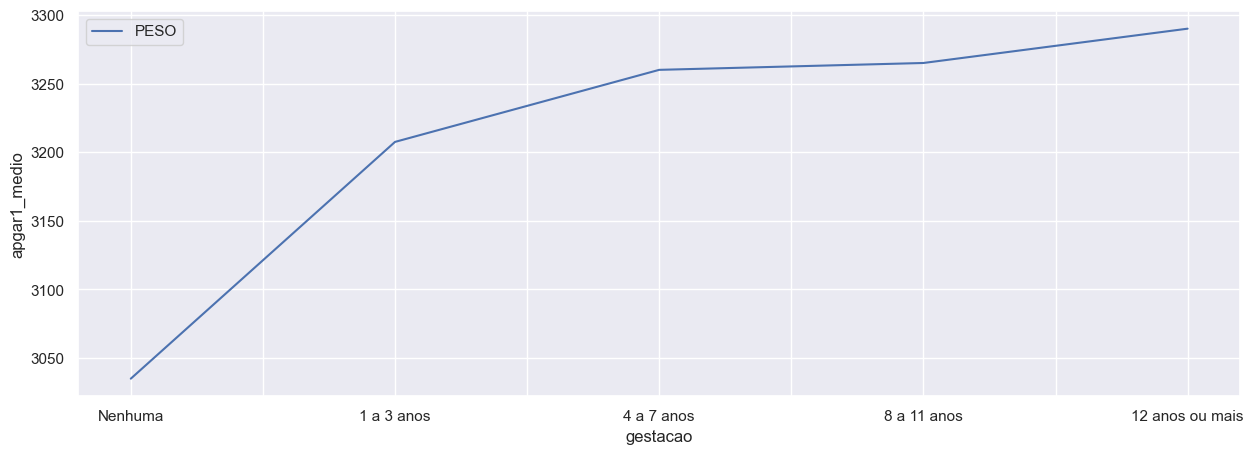

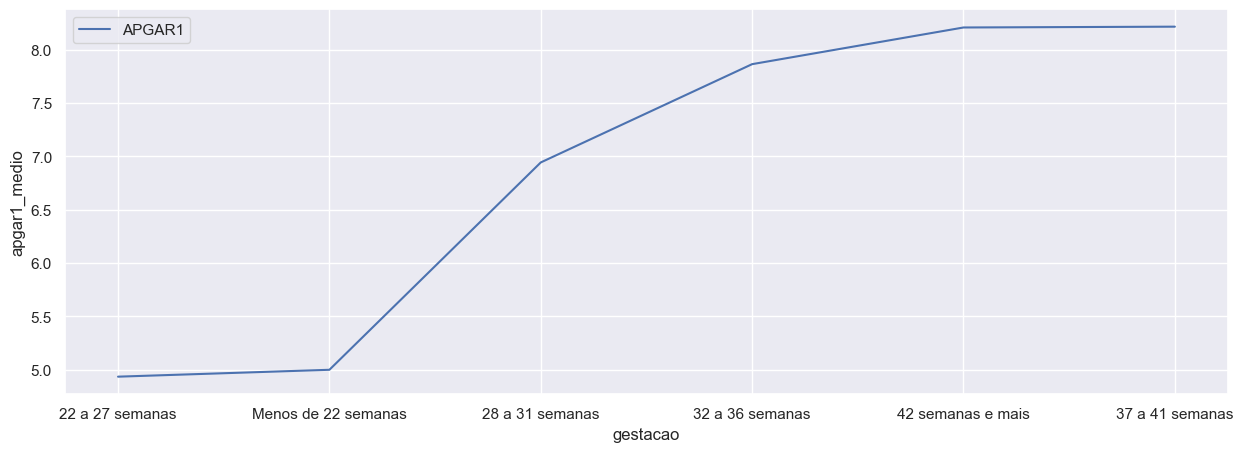

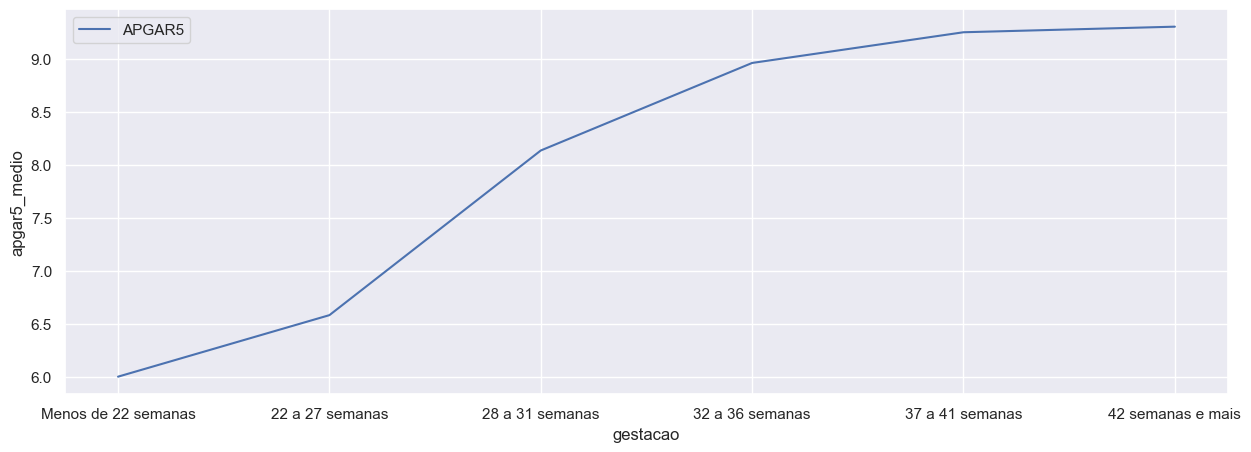

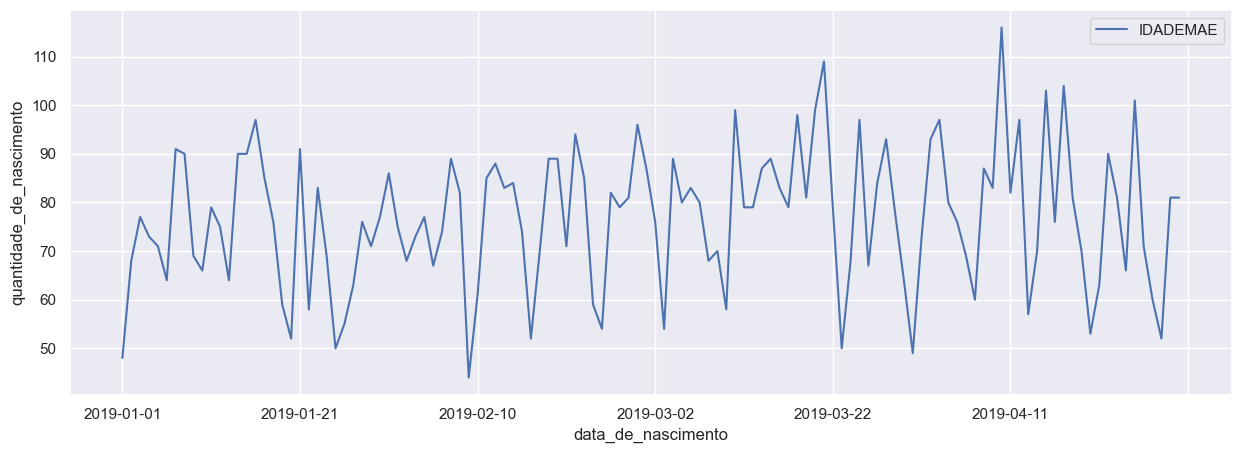

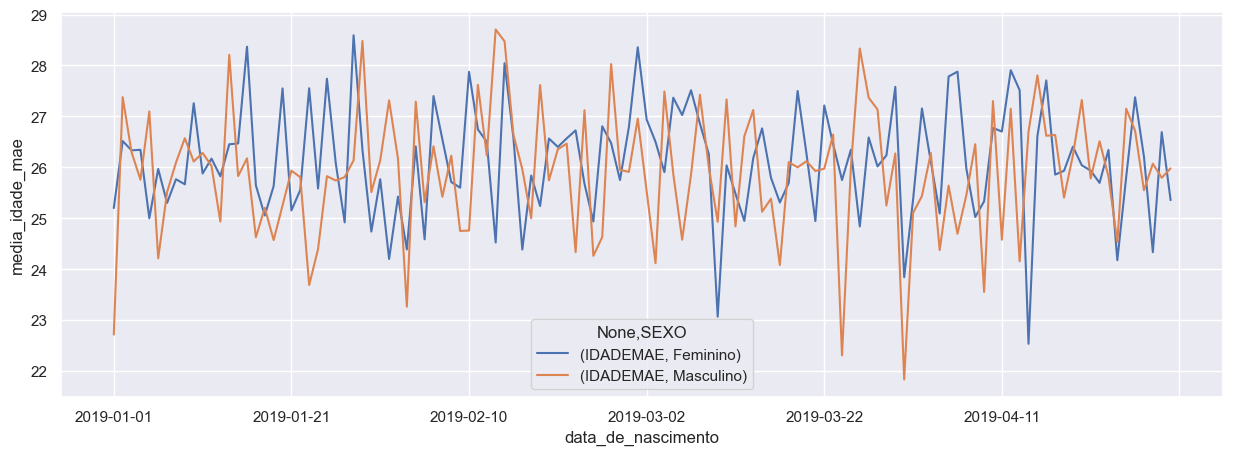

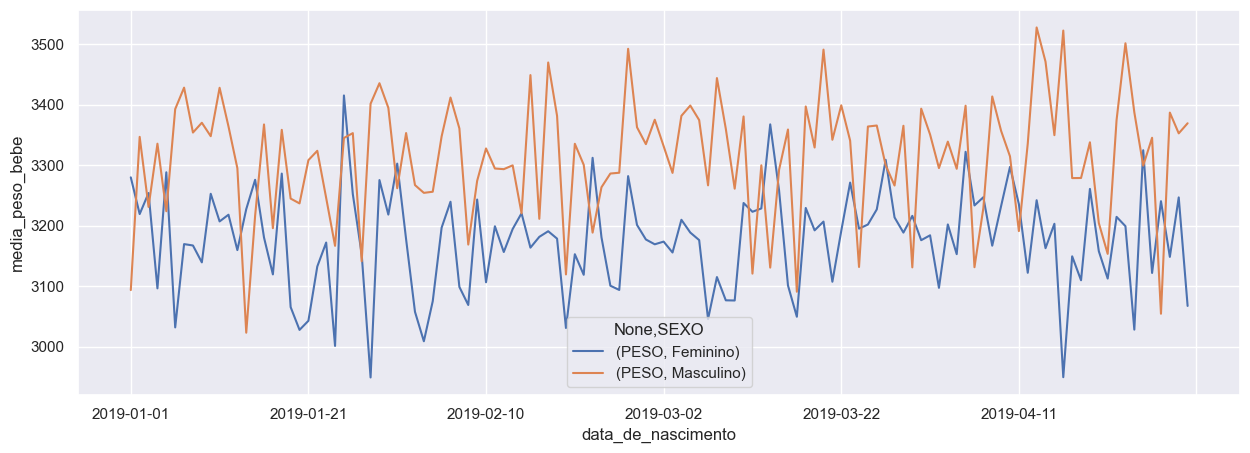

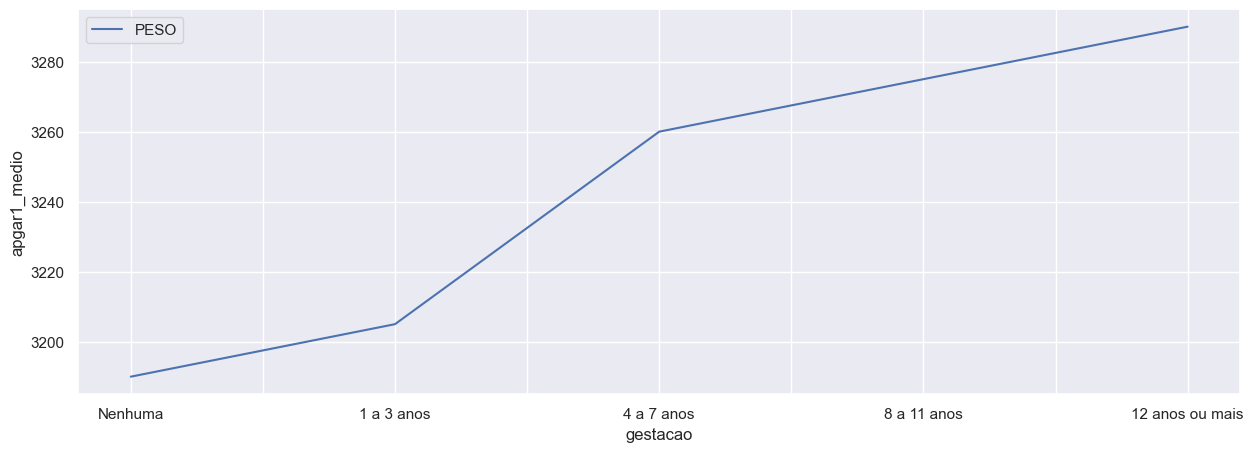

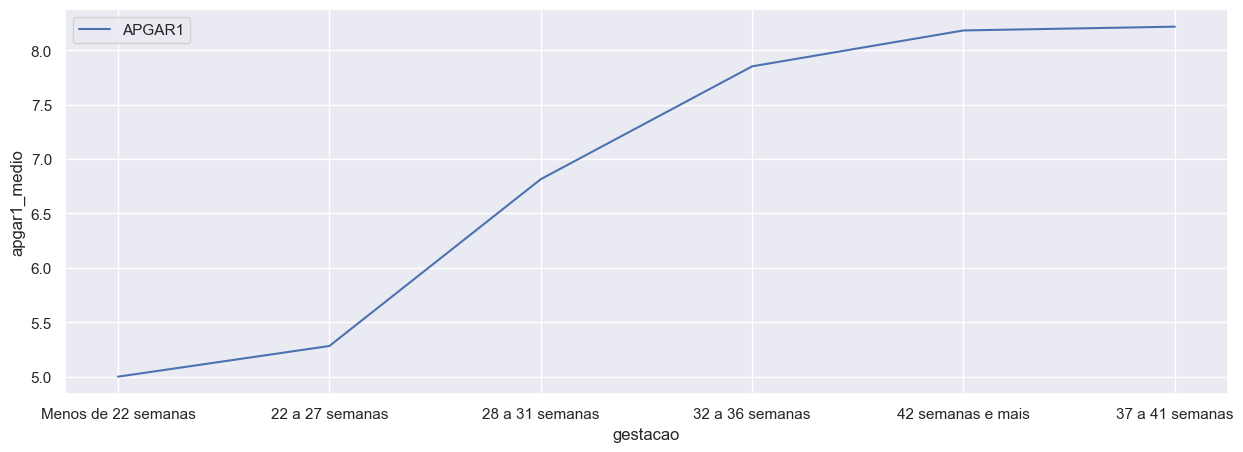

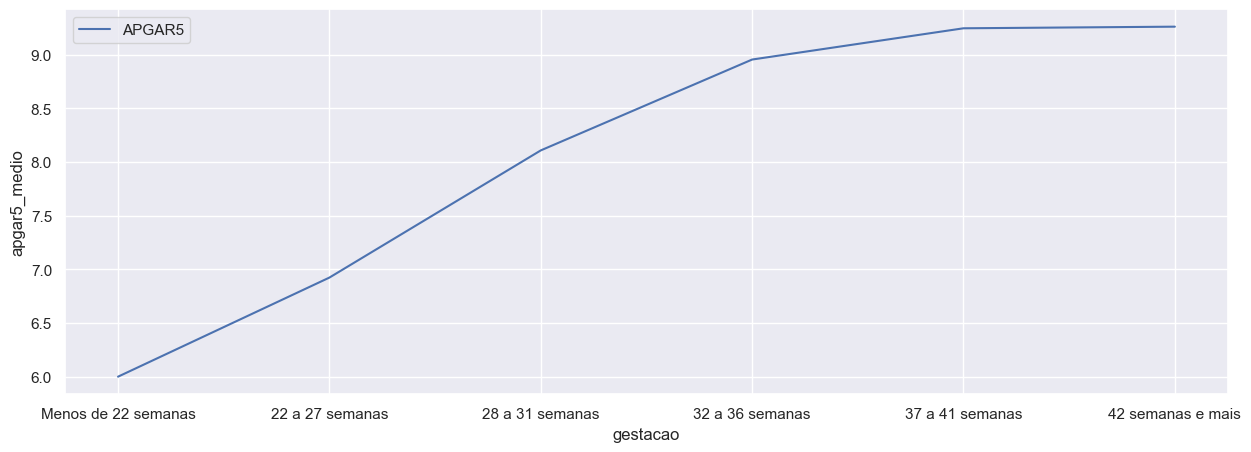

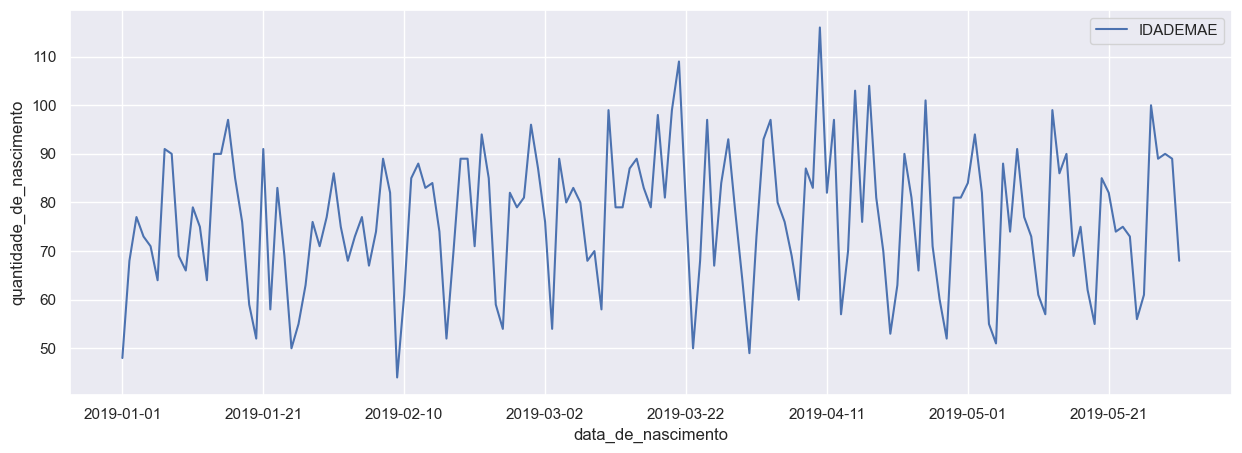

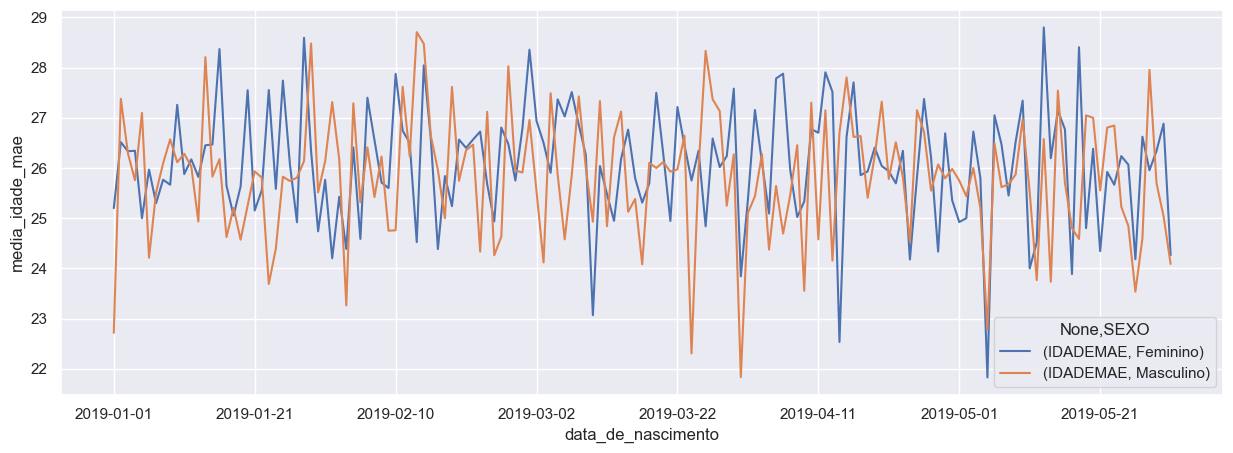

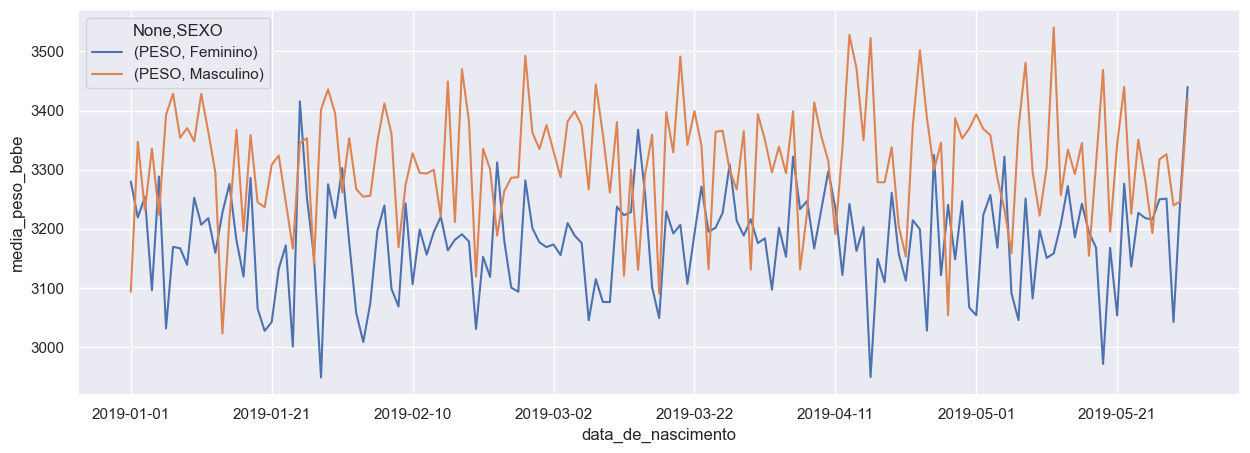

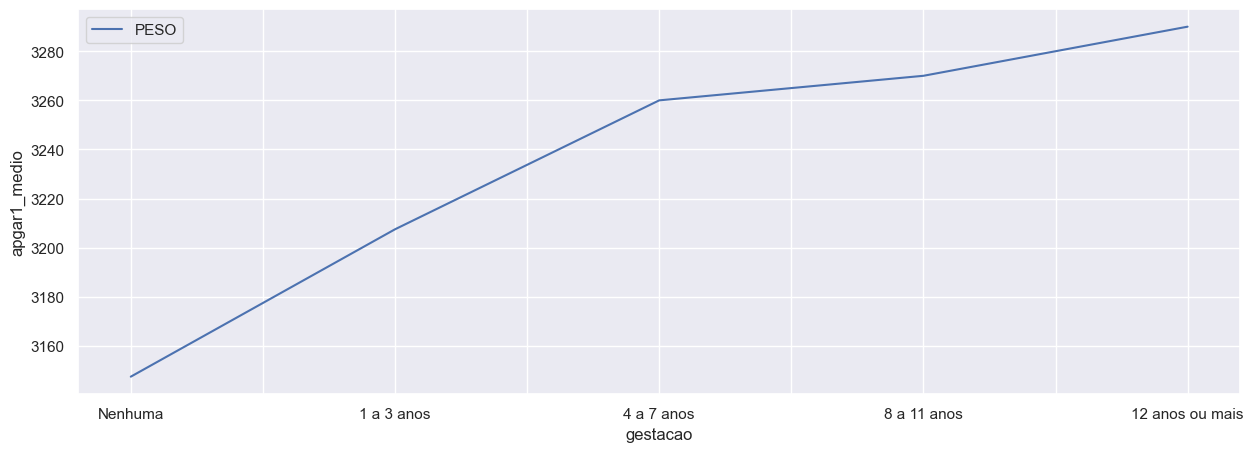

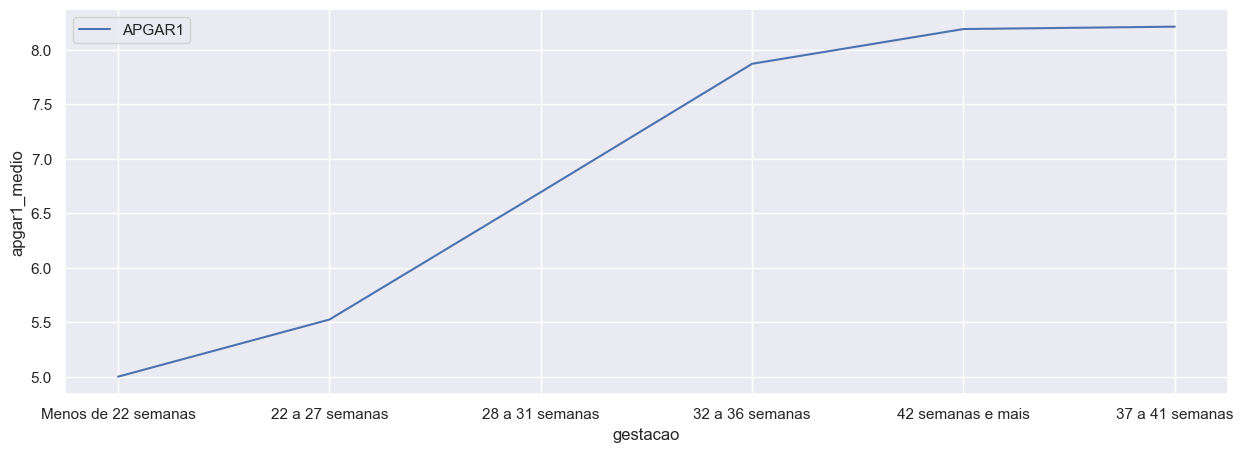

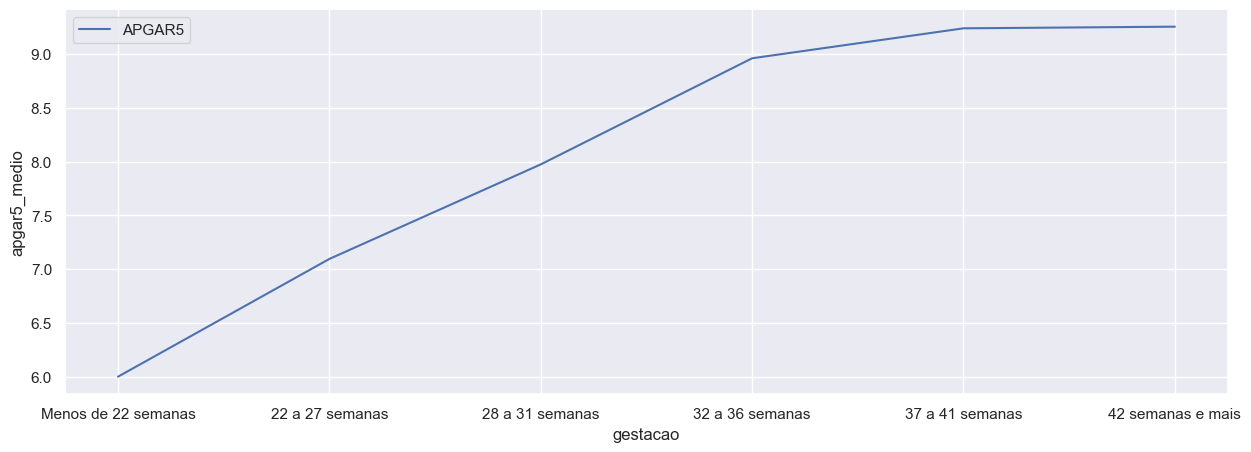

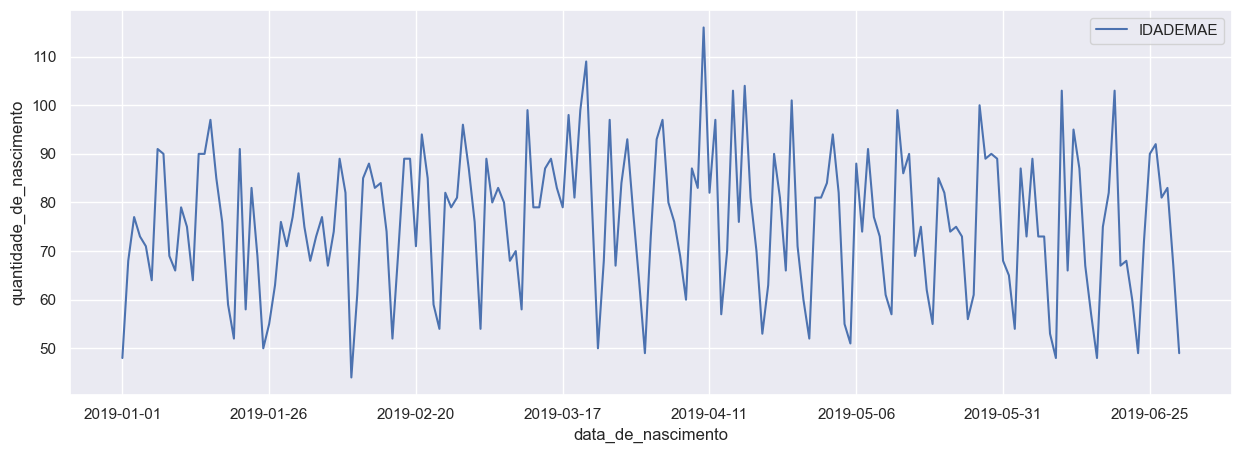

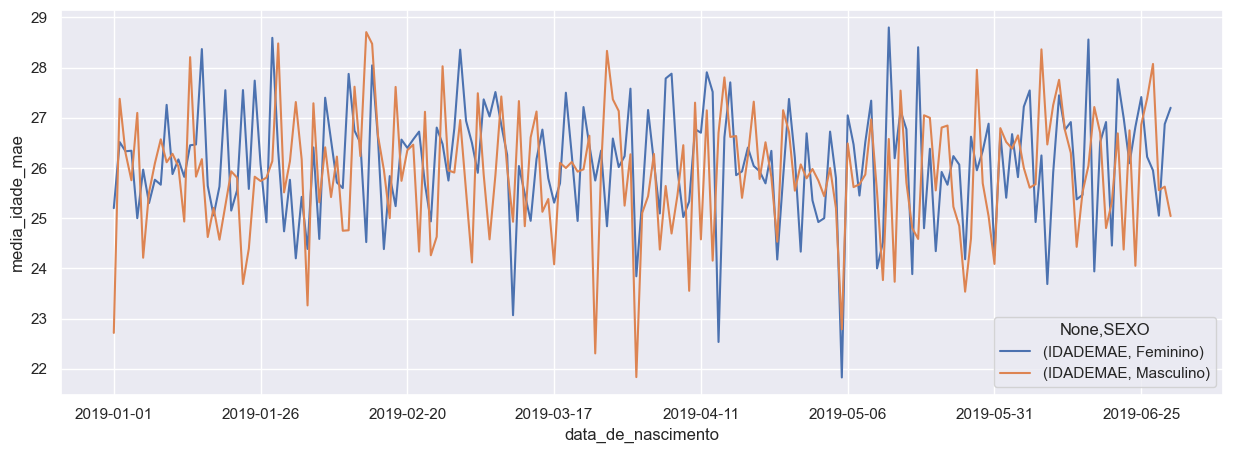

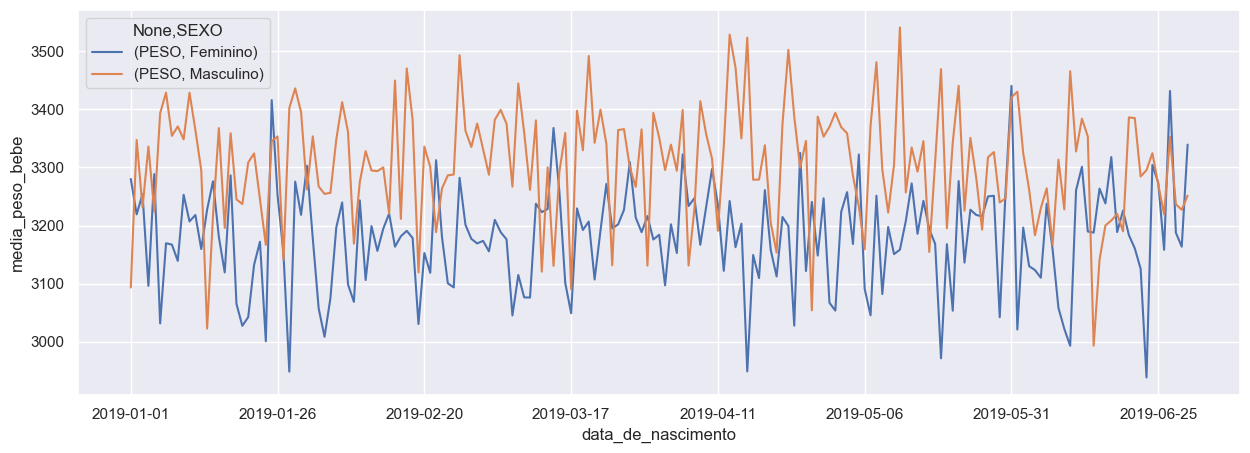

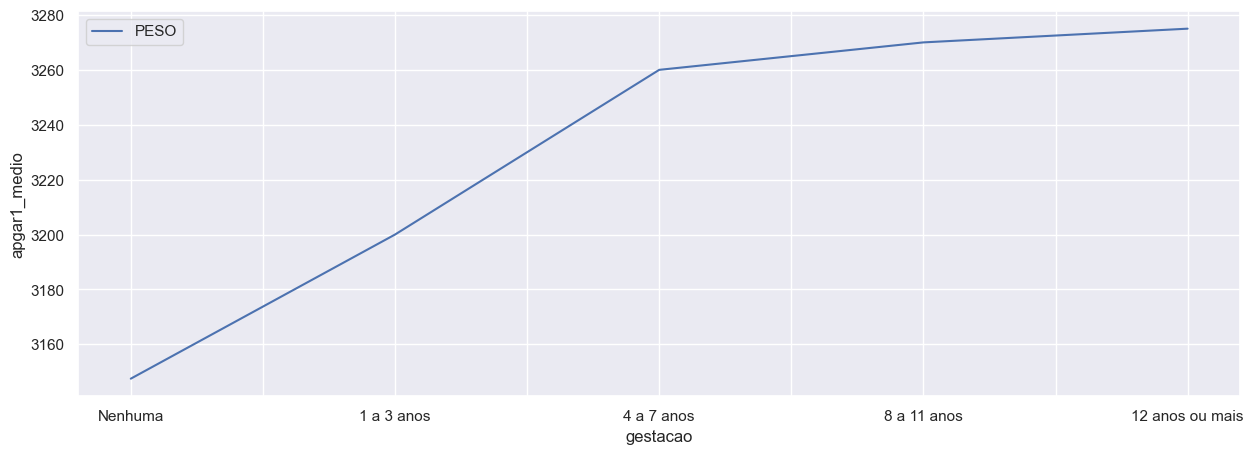

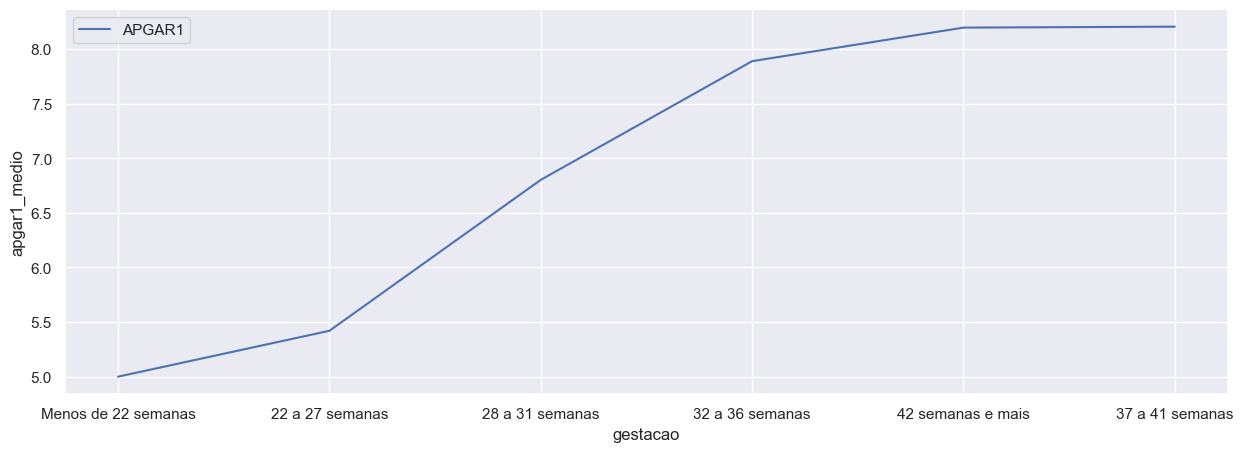

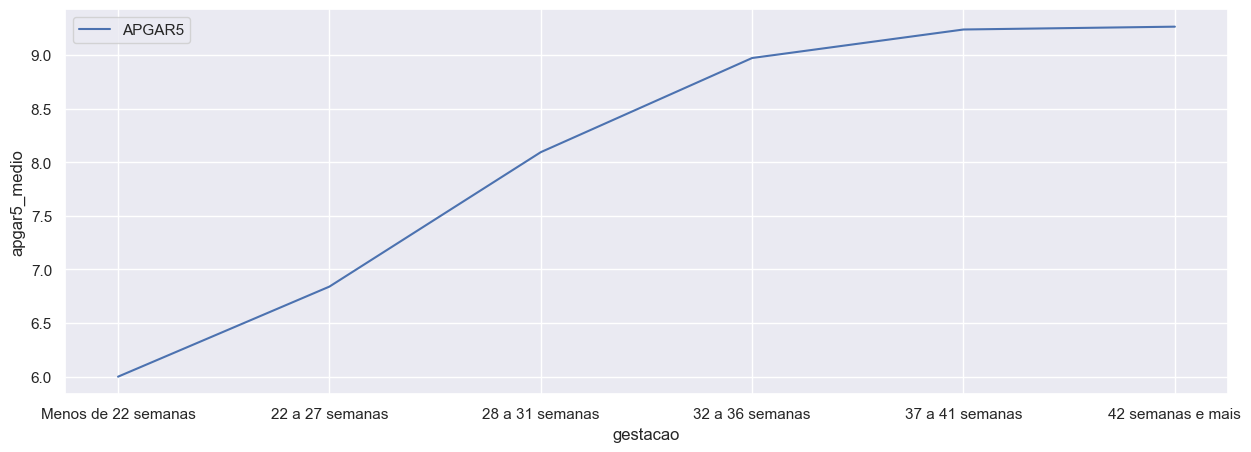

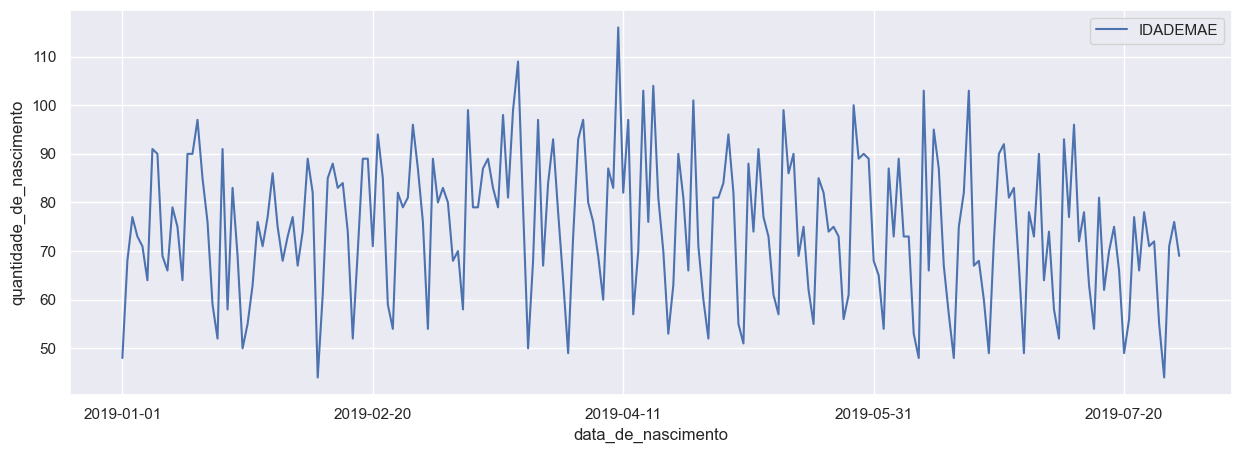

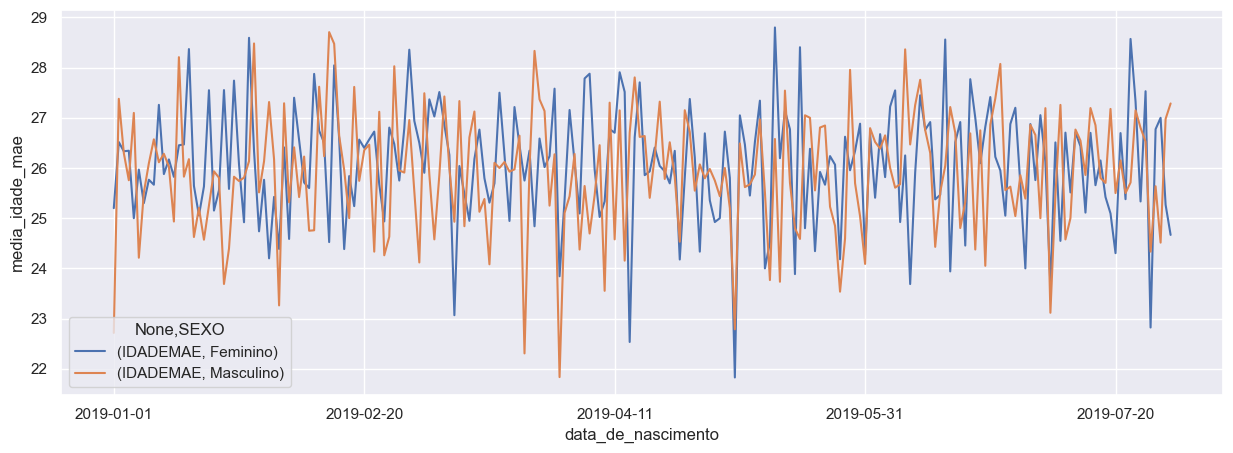

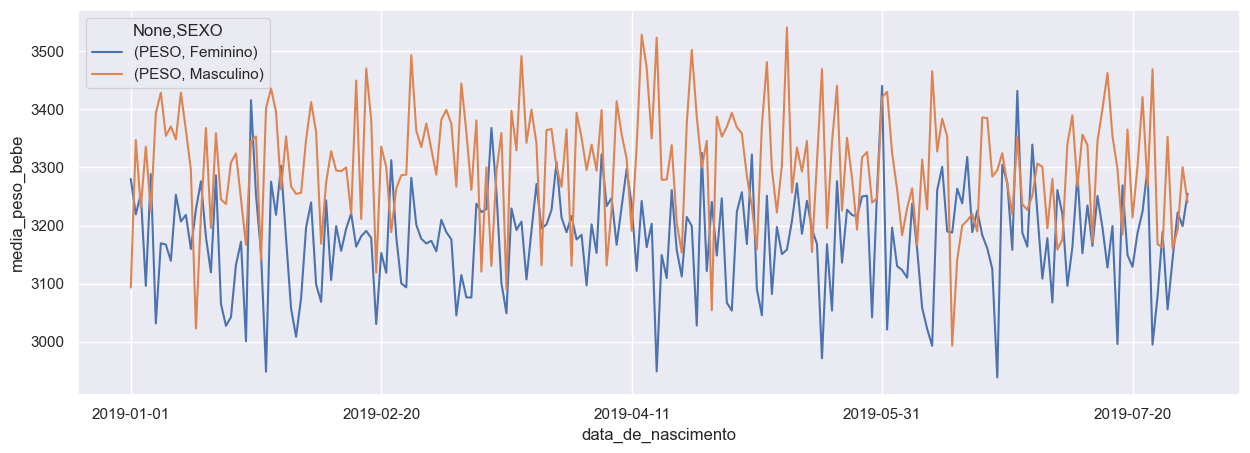

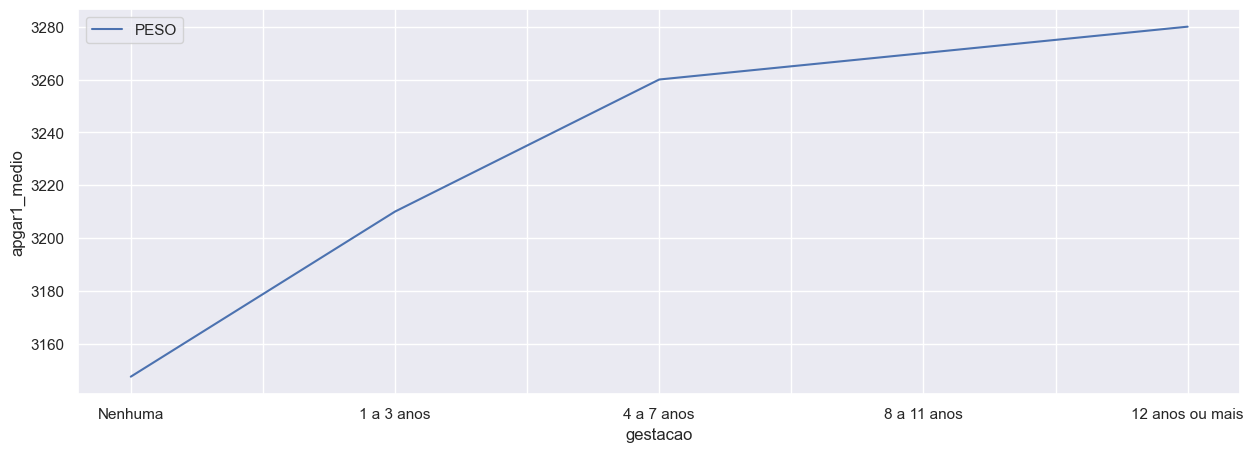

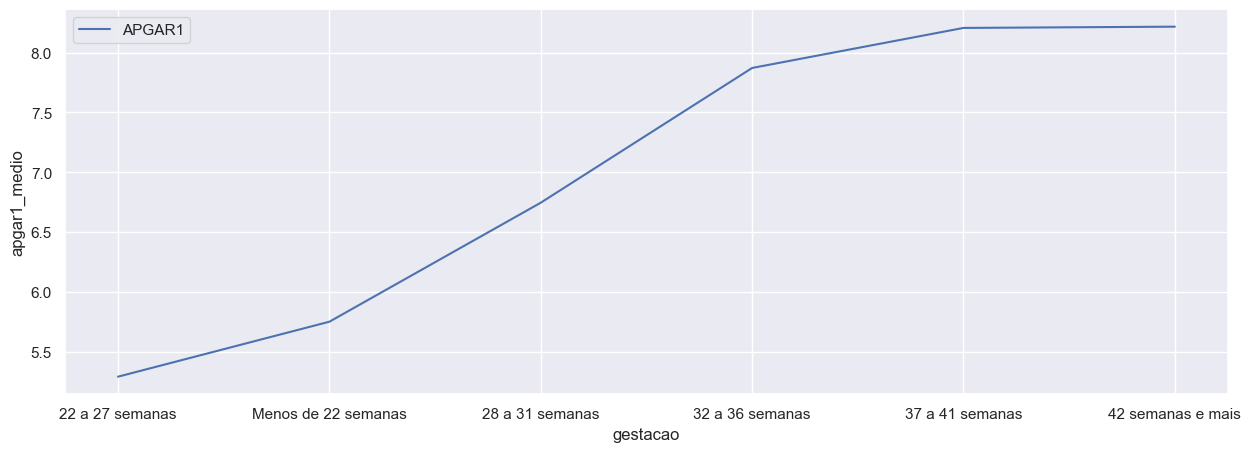

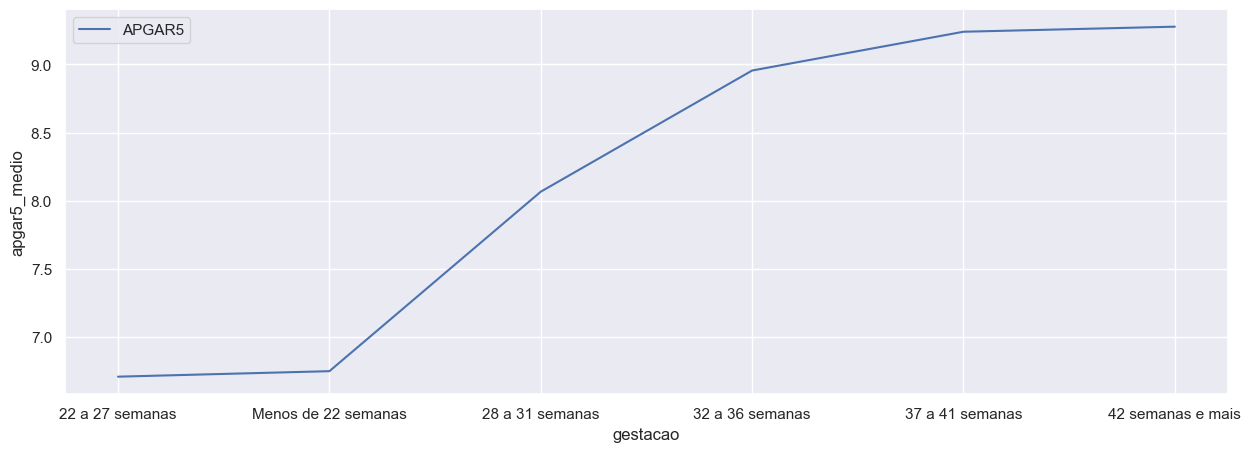

Não há dados disponíveis para o mês de MAR.
Não há dados disponíveis para o mês de ABR.
Não há dados disponíveis para o mês de MAI.
Não há dados disponíveis para o mês de JUN.
Não há dados disponíveis para o mês de JUL.


In [3]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
sns.set_theme()

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada', output_dir='./output/figs/'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.savefig(os.path.join(output_dir, f'{max_data}_{ylabel}.png'))
    plt.show()



def gerar_graficos(df, meses, output_dir='./output/figs/'):
    for mes in meses:
        dados_mes = df[df['DTNASC'].str.contains(mes, case=False)]  # Filtrar dados do mês atual
        if not dados_mes.empty:
            plt.figure(figsize=(10, 6))
            plt.title(f'Gráfico para o mês de {mes}')
            plt.plot(dados_mes['data'], dados_mes['valor'])
            plt.xlabel('Data')
            plt.ylabel('Valor')
            plt.grid(True)
            output_dir_mes = os.path.join(output_dir, mes)
            os.makedirs(output_dir_mes, exist_ok=True)
            plt.savefig(os.path.join(output_dir_mes, f'{max_data}_{mes}.png'))
            plt.show()
        else:
            print(f'Não há dados disponíveis para o mês de {mes}.')

output_dir = './output/figs/'
max_data = sinasc.DTNASC.max()[:7]
print(max_data)
meses = ['MAR', 'ABR', 'MAI', 'JUN', 'JUL']

for mes in meses:
    arquivo_csv = f'./input/SINASC_RO_2019_{mes}.csv'
    sinasc = pd.read_csv(arquivo_csv)
    max_data = sinasc['DTNASC'].max()[:7]

    # Criar diretório de saída específico para o mês atual, se ainda não existir
    output_dir_mes = os.path.join(output_dir, mes)
    os.makedirs(output_dir_mes, exist_ok=True)

    # Gerar gráficos com base no DataFrame atual e salvar dentro da pasta do mês
    plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'count', 'quantidade_de_nascimento',
                      'data_de_nascimento', output_dir=output_dir_mes)
    plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media_idade_mae', 'data_de_nascimento',
                      'unstack', output_dir=output_dir_mes)
    plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media_peso_bebe', 'data_de_nascimento',
                      'unstack', output_dir=output_dir_mes)
    plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'apgar1_medio',
                      'gestacao', 'sort', output_dir=output_dir_mes)
    plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1_medio',
                      'gestacao', 'sort', output_dir=output_dir_mes)
    plota_pivot_table(sinasc, 'APGAR5', 'GESTACAO', 'mean', 'apgar5_medio',
                      'gestacao', 'sort', output_dir=output_dir_mes)

novos_meses = ['MAR', 'ABR', 'MAI', 'JUN', 'JUL']
gerar_graficos(sinasc, novos_meses, output_dir=output_dir)